# Decision Tree (Regression)

Data Source: [NIST StRD]("https://www.itl.nist.gov/div898/strd/lls/data/LINKS/DATA/Longley.dat")

**Data Attributes**
- Employed: Total Employment
- GNP.deflator: GNP deflator
- GNP: GNP
- Unemployed: Number of unemployed
- Armed.Forces: Size of armed forces
- Population: Population
- Year: Year(1947-1962)

In [1]:
# Importing the necessary packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
import graphviz
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset
longley = pd.read_csv("./longley/longley.csv")
longley.head()

,y,x1,x2,x3,x4,x5,x6
0,60323,83.0,234289,2356,1590,107608,1947
1,61122,88.5,259426,2325,1456,108632,1948
2,60171,88.2,258054,3682,1616,109773,1949
3,61187,89.5,284599,3351,1650,110929,1950
4,63221,96.2,328975,2099,3099,112075,1951


In [3]:
# Renaming the columns as per data attributes from the source
longley.columns = ["employed", "gnp.deflator", "gnp", "unemployed", "armed.forces", "population", "year"]
longley.head()

,employed,gnp.deflator,gnp,unemployed,armed.forces,population,year
0,60323,83.0,234289,2356,1590,107608,1947
1,61122,88.5,259426,2325,1456,108632,1948
2,60171,88.2,258054,3682,1616,109773,1949
3,61187,89.5,284599,3351,1650,110929,1950
4,63221,96.2,328975,2099,3099,112075,1951


In [4]:
# Display the characteristics of dataset
print("Dimenions of dataset are: ", longley.shape)
print("The number of variables present in dataset are: \n", longley.columns)

Dimenions of dataset are:  (16, 7)
The number of variables present in dataset are: 
 Index(['employed', 'gnp.deflator', 'gnp', 'unemployed', 'armed.forces',
       'population', 'year'],
      dtype='object')


In [5]:
# Check for null and not available values
print("Null values present in dataset are: \n", longley.isnull().sum())
print("Not available values in dataset are: \n", longley.isna().sum())

Null values present in dataset are: 
 employed        0
gnp.deflator    0
gnp             0
unemployed      0
armed.forces    0
population      0
year            0
dtype: int64
Not available values in dataset are: 
 employed        0
gnp.deflator    0
gnp             0
unemployed      0
armed.forces    0
population      0
year            0
dtype: int64


In [6]:
# Using seed function to generate the same set of data
np.random.seed(3000)

In [7]:
# Train-Test split of both independent and dependent features
training, test = train_test_split(longley, test_size = 0.3)

x_trg = training.drop("employed", axis = 1)
y_trg = training["employed"]

x_test = test.drop("employed", axis = 1)
y_test = test["employed"]

### Model Builiding - DT model

In [8]:
# Model building
tree_longley = DecisionTreeRegressor(random_state = 0)

# Fit the model
tree_longley.fit(x_trg, y_trg)

DecisionTreeRegressor(random_state=0)

In [9]:
# Determine the importance of predictor variables
print("The importance of features of DT model for the dataset is: \n", tree_longley.feature_importances_)

The importance of features of DT model for the dataset is: 
 [1.52837434e-02 7.31292815e-01 1.30396594e-04 0.00000000e+00
 9.71814107e-02 1.56111634e-01]


In [10]:
# Visual representation of DT algorithm
export_graphviz(tree_longley, out_file = "./longley/longley.dot", feature_names = x_trg.columns,
               impurity = False, filled = True)

In [11]:
# Prediction on test dataset
tree_pred = tree_longley.predict(x_test)
tree_pred

array([68169., 68655., 66019., 68655., 68655.])

In [12]:
# Calculate the RMSE for the model
tree_rmse = sqrt(mean_squared_error(y_test, tree_pred))
print("The RMSE for DT model is: %0.3f" % tree_rmse)

The RMSE for DT model is: 1483.149


### Model Building - DT model (new)

In [13]:
# Creating a new DT model for speicified depth
tree_longley_1 = DecisionTreeRegressor(max_depth = 3, random_state = 0)

# Fit the new DT model
tree_longley_1.fit(x_trg, y_trg)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [14]:
# Visual representation with specified depth
export_graphviz(tree_longley_1, out_file = "./longley/tree_longley_1.dot", feature_names = x_trg.columns,
               impurity = False, filled = True)

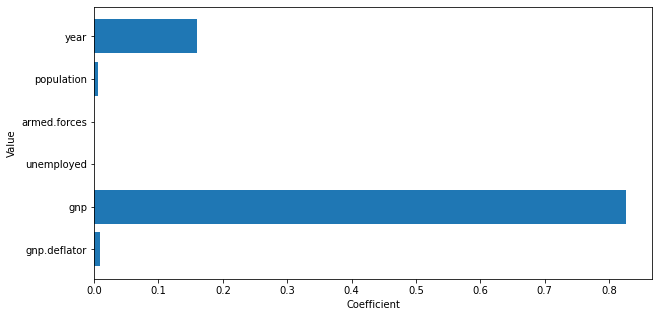

In [15]:
# Display the importance of each variable in new DT model
plt.figure(1, figsize = (10, 5))
plt.yticks(range(0,6), x_trg.columns)
plt.barh(range(0,6), tree_longley_1.feature_importances_, align = "center")
plt.xlabel("Coefficient")
plt.ylabel("Value")
plt.show()

In [16]:
# Prediction via new DT model
tree_pred_2 = tree_longley_1.predict(x_test)
tree_pred_2

array([68169., 68655., 66019., 68655., 68655.])

In [17]:
# Calculate the RMSE for new DT model
tree_rmse_2 = sqrt(mean_squared_error(y_test, tree_pred_2))
print("The RMSE of new DT model is: %0.3f" % tree_rmse_2)

The RMSE of new DT model is: 1483.149


#### Compare DT models with kNN model

The RMSE of kNN model is: 1483.149
The RMSE of kNN model is: 1478.875
The RMSE of kNN model is: 1935.476
The RMSE of kNN model is: 2450.920
The RMSE of kNN model is: 2825.769
The RMSE of kNN model is: 3219.928
The RMSE of kNN model is: 3563.880
The RMSE of kNN model is: 4063.408
The RMSE of kNN model is: 4465.021
The RMSE of kNN model is: 4880.253


The least RMSE for kNN model is: 1478.875


<AxesSubplot:>

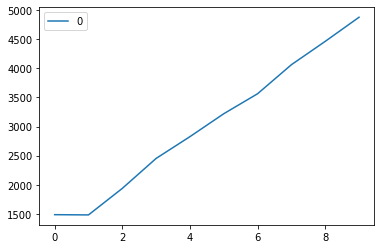

In [18]:
# Model building - kNN
knn_rmselist = []
for K in range(10):
    K = K + 1
    # Model building
    knn_longley = KNeighborsRegressor(n_neighbors = K)
    
    # Fit the model
    knn_longley.fit(x_trg, y_trg)
    
    # Prediction
    knn_pred = knn_longley.predict(x_test)
    
    # Calculate RMSE
    knn_rmse = sqrt(mean_squared_error(y_test, knn_pred))
    
    print("The RMSE of kNN model is: %0.3f" %knn_rmse)
    
    knn_rmselist.append(knn_rmse)
print("\n")
print("The least RMSE for kNN model is: %0.3f" %min(knn_rmselist))

# Visualization
curve = pd.DataFrame(knn_rmselist)
curve.plot()

#### Compare DT models with Linear Rergression model

In [19]:
# Model Buildin
lm_longley = linear_model.LinearRegression()

# Fit the model
lm_longley.fit(x_trg, y_trg)

# Prediction
lm_pred = lm_longley.predict(x_test)

# Coefficient & Intercept
print("Coefficent of independent variables in the model are: \n", lm_longley.coef_)
print("Intercept in the model is: ", lm_longley.intercept_)

# Calculate the RMSE
lm_rmse = sqrt(mean_squared_error(y_test, lm_pred))
print("The RMSE for Linear Regression model is: %0.3f" %lm_rmse)

Coefficent of independent variables in the model are: 
 [-2.34589916e+01 -4.73623078e-03 -1.51770957e+00 -7.18819381e-01
  2.93957993e-01  7.27599986e+02]
Intercept in the model is:  -1380259.1919507803
The RMSE for Linear Regression model is: 802.861


Upon checking the peformances of models built, The Linear Regression model is best.